In [37]:
import pandas as pd
data = pd.read_csv('age_of_marriage_data.csv')
print(data.shape)
data.head()

(2567, 10)


,id,gender,height,religion,caste,mother_tongue,profession,location,country,age_of_marriage
0,1,female,"5'4""",NaN,others,Telugu,NaN,London,United Kingdom,21.0
1,2,male,"5'7""",Jain,Shwetamber,Gujarati,Doctor / Healthcare Professional,Fairfax- VA,USA,32.0
2,3,male,"5'7""",Hindu,Brahmin,Hindi,Entrepreneurs / Business,Begusarai,India,32.0
3,4,female,"5'0""",Hindu,Thakur,Hindi,Architect,Mumbai,India,30.0
4,5,male,"5'5""",Christian,Born Again,Malayalam,Sales Professional / Marketing,Sulthan Bathery,India,30.0


In [38]:
data['height'].unique()

array(['5\'4"', '5\'7"', '5\'0"', '5\'5"', '5\'2"', '5\'1"', '5\'3"',
       '5\'9"', '5\'10"', nan, '5\'6"', '4\'5"', '5\'11"', '5\'8"',
       '6\'5"', '4\'11"', '4\'7"', '4\'9"', '6\'2"', '6\'1"', '6\'0"',
       '4\'6"', '4\'10"', '4\'8"', '6\'10"', '6\'8"', '6\'3"', '7\'0"',
       '6\'4"'], dtype=object)

In [39]:
data.describe()

,id,age_of_marriage
count,2567.000000,2548.000000
mean,1284.000000,29.648352
std,741.173394,2.802414
min,1.000000,20.000000
25%,642.500000,28.000000
50%,1284.000000,30.000000
75%,1925.500000,32.000000
max,2567.000000,36.000000


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2567 entries, 0 to 2566
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2567 non-null   int64  
 1   gender           2538 non-null   object 
 2   height           2449 non-null   object 
 3   religion         1932 non-null   object 
 4   caste            2425 non-null   object 
 5   mother_tongue    2403 non-null   object 
 6   profession       2237 non-null   object 
 7   location         2412 non-null   object 
 8   country          2551 non-null   object 
 9   age_of_marriage  2548 non-null   float64
dtypes: float64(1), int64(1), object(8)
memory usage: 200.7+ KB


In [41]:
data.isnull().sum()

id                   0
gender              29
height             118
religion           635
caste              142
mother_tongue      164
profession         330
location           155
country             16
age_of_marriage     19
dtype: int64

In [42]:
(data.shape[0] - data.dropna().shape[0])/data.shape[0]

0.24737047136735488

In [43]:
data.dropna(inplace=True)

In [44]:
data.shape

(1932, 10)

In [45]:
data.head(2)

,id,gender,height,religion,caste,mother_tongue,profession,location,country,age_of_marriage
1,2,male,"5'7""",Jain,Shwetamber,Gujarati,Doctor / Healthcare Professional,Fairfax- VA,USA,32.0
2,3,male,"5'7""",Hindu,Brahmin,Hindi,Entrepreneurs / Business,Begusarai,India,32.0


In [46]:
data.profession.unique()

array(['Doctor / Healthcare Professional', 'Entrepreneurs / Business ',
       'Architect', 'Sales Professional / Marketing', 'Sportsman',
       'Banking Professional', 'Software Professional', 'HR Professional',
       'Finance Professional', 'Not Specified', 'Not working',
       'Chartered Accountant', 'Logistics and Travel Professional',
       'Defense Services', 'Team Member / Staff',
       'Managers and Senior Executives', 'Admin Professional',
       'Accounting Professional (Others)', 'Investment Professional',
       'Civil Engineer', 'Consultant / Supervisor / Team Leads',
       'Public Relations Professional', 'Training Professional (Others)',
       'Hotel & Hospitality Professional (Others)',
       'Software Professional (Others)', 'Nurse', 'Artist (Others)',
       'Non IT Engineer (Others)', 'Event Manager',
       'Marketing Professional', 'Science Professional (Others)',
       'Mechanical / Production Engineer', 'Research Assistant',
       'Electronics / Telecom

In [47]:
X = data.loc[:,['gender','height','religion','caste','mother_tongue','country']]
y = data.age_of_marriage

In [48]:
X.head()

,gender,height,religion,caste,mother_tongue,country
1,male,"5'7""",Jain,Shwetamber,Gujarati,USA
2,male,"5'7""",Hindu,Brahmin,Hindi,India
3,female,"5'0""",Hindu,Thakur,Hindi,India
4,male,"5'5""",Christian,Born Again,Malayalam,India
5,male,"5'5""",Hindu,Valmiki,Hindi,India


C:\Users\racha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


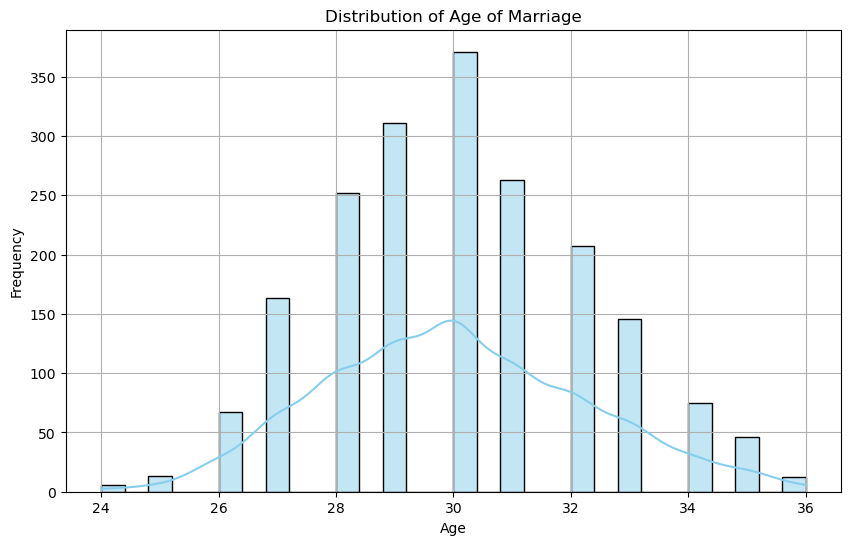

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the distribution of the 'age_of_marriage' variable
plt.figure(figsize=(10, 6))
sns.histplot(data['age_of_marriage'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Age of Marriage')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


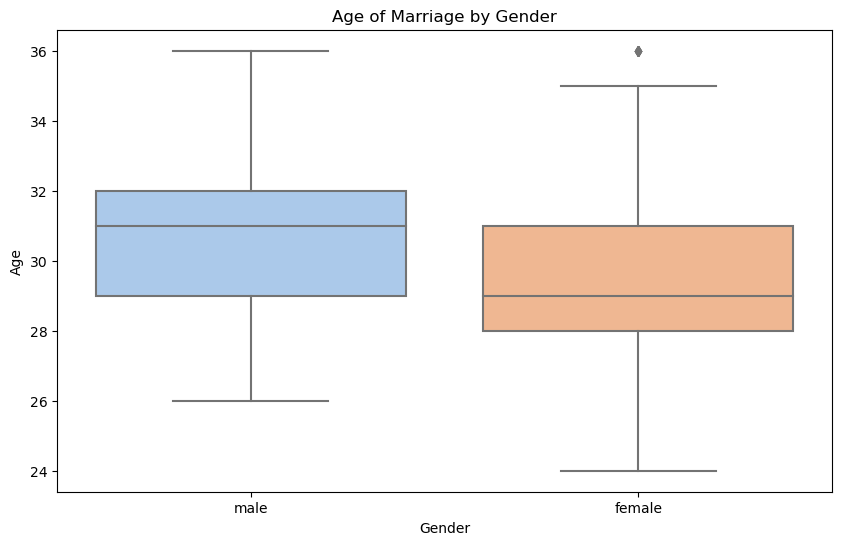

In [76]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='age_of_marriage', data=data, palette='pastel')
plt.title('Age of Marriage by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()


C:\Users\racha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


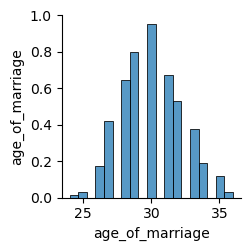

In [77]:
sns.pairplot(data[['age_of_marriage', 'height', 'religion', 'caste', 'mother_tongue', 'country']])
plt.show()


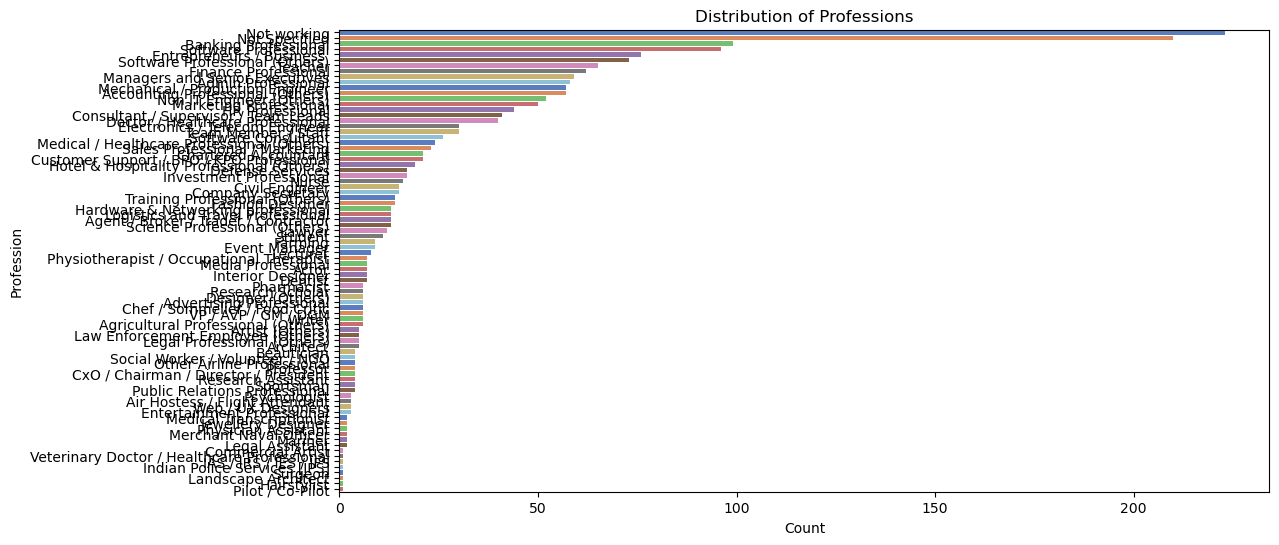

In [78]:
plt.figure(figsize=(12, 6))
sns.countplot(y='profession', data=data, order=data['profession'].value_counts().index, palette='muted')
plt.title('Distribution of Professions')
plt.xlabel('Count')
plt.ylabel('Profession')
plt.show()


In [49]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
X.loc[:,['gender','religion','caste','mother_tongue','country']]= \
X.loc[:,['gender','religion','caste','mother_tongue','country']].apply(enc.fit_transform)

In [50]:
X.head()

,gender,height,religion,caste,mother_tongue,country
1,1,"5'7""",2,34,6,19
2,1,"5'7""",1,14,8,5
3,0,"5'0""",1,36,8,5
4,1,"5'5""",0,13,13,5
5,1,"5'5""",1,38,8,5


In [51]:
int(X.loc[1,'height'].split('\'')[0])*30.48

152.4

In [52]:
int(X.loc[1,'height'].split('\'')[1].replace('"',''))*2.54

17.78

In [53]:
def h_cms(h):
    return int(h.split('\'')[0])*30.48+\
    int(h.split('\'')[1].replace('"',''))*2.54

In [54]:
X['height_cms'] = X.height.apply(h_cms)

In [55]:
X.head()

,gender,height,religion,caste,mother_tongue,country,height_cms
1,1,"5'7""",2,34,6,19,170.18
2,1,"5'7""",1,14,8,5,170.18
3,0,"5'0""",1,36,8,5,152.40
4,1,"5'5""",0,13,13,5,165.10
5,1,"5'5""",1,38,8,5,165.10


In [56]:
X.drop('height',inplace=True,axis=1)

In [57]:
X.head()

,gender,religion,caste,mother_tongue,country,height_cms
1,1,2,34,6,19,170.18
2,1,1,14,8,5,170.18
3,0,1,36,8,5,152.40
4,1,0,13,13,5,165.10
5,1,1,38,8,5,165.10


In [59]:
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined after preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# RandomForestRegressor

In [60]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=80, max_depth=11, random_state=0)

# Fit the model
rf_model.fit(X_train, y_train)

# Make predictions
rf_y_predict = rf_model.predict(X_test)

# Calculate metrics
rf_mae = mean_absolute_error(y_test, rf_y_predict)
rf_r2 = r2_score(y_test, rf_y_predict)

# Output results
print("Random Forest MAE:", rf_mae)
print("Random Forest R² Score:", rf_r2)

# Keep track of performance
performances = {'RandomForest': {'MAE': rf_mae, 'R2': rf_r2}}


Random Forest MAE: 1.0305680989816008
Random Forest R² Score: 0.7002820876418563


# GradientBoostingRegressor

In [61]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the model
gb_model = GradientBoostingRegressor(n_estimators=100, max_depth=5)

# Fit the model
gb_model.fit(X_train, y_train)

# Make predictions
gb_y_predict = gb_model.predict(X_test)

# Calculate metrics
gb_mae = mean_absolute_error(y_test, gb_y_predict)
gb_r2 = r2_score(y_test, gb_y_predict)

# Output results
print("Gradient Boosting MAE:", gb_mae)
print("Gradient Boosting R² Score:", gb_r2)

# Update performance tracking
performances['GradientBoosting'] = {'MAE': gb_mae, 'R2': gb_r2}


Gradient Boosting MAE: 1.0251857458317035
Gradient Boosting R² Score: 0.7077102087551665


# Support Vector Regression (SVR)

In [62]:
from sklearn.svm import SVR

# Initialize the model
svr_model = SVR(kernel='rbf')

# Fit the model
svr_model.fit(X_train, y_train)

# Make predictions
svr_y_predict = svr_model.predict(X_test)

# Calculate metrics
svr_mae = mean_absolute_error(y_test, svr_y_predict)
svr_r2 = r2_score(y_test, svr_y_predict)

# Output results
print("Support Vector Regression MAE:", svr_mae)
print("Support Vector Regression R² Score:", svr_r2)

# Update performance tracking
performances['SVR'] = {'MAE': svr_mae, 'R2': svr_r2}


Support Vector Regression MAE: 1.7009563249196955
Support Vector Regression R² Score: 0.0799109492187634


# Linear Regression

In [64]:
from sklearn.linear_model import LinearRegression

# Initialize the model
lr_model = LinearRegression()

# Fit the model
lr_model.fit(X_train, y_train)

# Make predictions
lr_y_predict = lr_model.predict(X_test)

# Calculate metrics
lr_mae = mean_absolute_error(y_test, lr_y_predict)
lr_r2 = r2_score(y_test, lr_y_predict)

# Output results
print("Linear Regression MAE:", lr_mae)
print("Linear Regression R² Score:", lr_r2)

# Update performance tracking
performances['LinearRegression'] = {'MAE': lr_mae, 'R2': lr_r2}


Linear Regression MAE: 1.664321892460258
Linear Regression R² Score: 0.1283551036765922


# K-Nearest Neighbors Regressor

In [65]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize the model
knn_model = KNeighborsRegressor(n_neighbors=5)

# Fit the model
knn_model.fit(X_train, y_train)

# Make predictions
knn_y_predict = knn_model.predict(X_test)

# Calculate metrics
knn_mae = mean_absolute_error(y_test, knn_y_predict)
knn_r2 = r2_score(y_test, knn_y_predict)

# Output results
print("K-Nearest Neighbors MAE:", knn_mae)
print("K-Nearest Neighbors R² Score:", knn_r2)

# Update performance tracking
performances['KNN'] = {'MAE': knn_mae, 'R2': knn_r2}


K-Nearest Neighbors MAE: 1.4708010335917312
K-Nearest Neighbors R² Score: 0.2815420825618242


# Lasso Regression

In [66]:
from sklearn.linear_model import Lasso

# Initialize the model
lasso_model = Lasso(alpha=0.1)

# Fit the model
lasso_model.fit(X_train, y_train)

# Make predictions
lasso_y_predict = lasso_model.predict(X_test)

# Calculate metrics
lasso_mae = mean_absolute_error(y_test, lasso_y_predict)
lasso_r2 = r2_score(y_test, lasso_y_predict)

# Output results
print("Lasso Regression MAE:", lasso_mae)
print("Lasso Regression R² Score:", lasso_r2)

# Update performance tracking
performances['Lasso'] = {'MAE': lasso_mae, 'R2': lasso_r2}


Lasso Regression MAE: 1.6857688588039
Lasso Regression R² Score: 0.10560679804680484


# Ridge Regression

In [67]:
from sklearn.linear_model import Ridge

# Initialize the model
ridge_model = Ridge(alpha=0.1)

# Fit the model
ridge_model.fit(X_train, y_train)

# Make predictions
ridge_y_predict = ridge_model.predict(X_test)

# Calculate metrics
ridge_mae = mean_absolute_error(y_test, ridge_y_predict)
ridge_r2 = r2_score(y_test, ridge_y_predict)

# Output results
print("Ridge Regression MAE:", ridge_mae)
print("Ridge Regression R² Score:", ridge_r2)

# Update performance tracking
performances['Ridge'] = {'MAE': ridge_mae, 'R2': ridge_r2}


Ridge Regression MAE: 1.6643293769483198
Ridge Regression R² Score: 0.1283491905216133


# ElasticNet Regression

In [68]:
from sklearn.linear_model import ElasticNet

# Initialize the model
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Fit the model
elastic_net_model.fit(X_train, y_train)

# Make predictions
elastic_net_y_predict = elastic_net_model.predict(X_test)

# Calculate metrics
elastic_net_mae = mean_absolute_error(y_test, elastic_net_y_predict)
elastic_net_r2 = r2_score(y_test, elastic_net_y_predict)

# Output results
print("ElasticNet Regression MAE:", elastic_net_mae)
print("ElasticNet Regression R² Score:", elastic_net_r2)

# Update performance tracking
performances['ElasticNet'] = {'MAE': elastic_net_mae, 'R2': elastic_net_r2}


ElasticNet Regression MAE: 1.679233788649526
ElasticNet Regression R² Score: 0.112872364596177


In [69]:
# Create a DataFrame from the performances dictionary
performance_df = pd.DataFrame.from_dict(performances, orient='index')

# Calculate accuracy percentage for R2 score
performance_df['R2'] *= 100

# Sort models by R2 score
performance_df_sorted = performance_df.sort_values(by='R2', ascending=False)

# Print the sorted DataFrame
print(performance_df_sorted)


                       MAE         R2
GradientBoosting  1.025186  70.771021
RandomForest      1.030568  70.028209
KNN               1.470801  28.154208
LinearRegression  1.664322  12.835510
Ridge             1.664329  12.834919
ElasticNet        1.679234  11.287236
Lasso             1.685769  10.560680
SVR               1.700956   7.991095


In [70]:
# Create a DataFrame from the performances dictionary
performance_df = pd.DataFrame.from_dict(performances, orient='index')

# Calculate the R² score as a percentage
performance_df['R2'] *= 100

# Identify the best and worst models based on R² score
best_model_name = performance_df['R2'].idxmax()
worst_model_name = performance_df['R2'].idxmin()

# Extract the best and worst model performances
best_model_performance = performance_df.loc[best_model_name]
worst_model_performance = performance_df.loc[worst_model_name]

# Print the best and worst model names and their R² score
print(f"Best Model: {best_model_name} with R² Score: {best_model_performance['R2']:.2f}%")
print(f"Worst Model: {worst_model_name} with R² Score: {worst_model_performance['R2']:.2f}%")


Best Model: GradientBoosting with R² Score: 70.77%
Worst Model: SVR with R² Score: 7.99%


In [72]:
import joblib

# Save the RandomForest model as a .pkl file
joblib.dump(rf_model, 'marriage_age_predict_model.pkl')

print("RandomForest model saved as .pkl file.")


RandomForest model saved as .pkl file.


In [73]:
from sklearn.ensemble import RandomForestRegressor
import joblib

# Assuming rf_model is your trained RandomForest model
rf_model = RandomForestRegressor(n_estimators=80, max_depth=11, random_state=0)
rf_model.fit(X_train, y_train)  # Make sure you've already split the data and trained the model

# Now let's save the model using joblib.dump with a .ml extension
joblib.dump(rf_model, 'marriage_age_predict_model.ml')


['marriage_age_predict_model.ml']